## EDA AND BASIC DATA VISUALIZATION USING MATPLOTLIB & SEABORN

Source : https://www.kaggle.com/c/tabular-playground-series-jan-2022/overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_ = pd.read_csv('train.csv', index_col = 'row_id')
test_ = pd.read_csv('test.csv', index_col = 'row_id')

In [3]:
display(train_.head())

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


Display a brief of the data that we have

In [63]:
print(train_.info())
print('-'*50)
print('number of duplicates : {0}'.format(train_.duplicated().sum()))
print('-'*50)
print('total missing values :')
print(train_.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   country   26298 non-null  object        
 2   store     26298 non-null  object        
 3   product   26298 non-null  object        
 4   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.2+ MB
None
--------------------------------------------------
number of duplicates : 0
--------------------------------------------------
total missing values :
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


First, we need the info of our data and check whether there are missing values and duplicates in our data. It seems there are no missing values and duplicates in our data, so we can proceed our analysis.

In [5]:
for i in ['country','store','product']:
    val = train_[i].value_counts()
    print(val)
    print('-'*50)

Finland    8766
Norway     8766
Sweden     8766
Name: country, dtype: int64
--------------------------------------------------
KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64
--------------------------------------------------
Kaggle Mug        8766
Kaggle Hat        8766
Kaggle Sticker    8766
Name: product, dtype: int64
--------------------------------------------------


At this part we want to know all the unique values in each of categorical variables ('Country','Store','Product'). country variables has 3 unique values that are ('Finland','Norway','Sweden'). Store variables has 2 that are ('KaggleMart','KaggleRama) .Product variables has 3 that are ('Kaggle Mug','Kaggle Hat','Kaggle Sticker')

In [6]:
train_['date'] = pd.to_datetime(train_['date'],format = '%Y-%m-%d', errors = 'raise')
print(train_.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   country   26298 non-null  object        
 2   store     26298 non-null  object        
 3   product   26298 non-null  object        
 4   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.2+ MB
None


Convert date into datetime type using pd.to_datetime()

In [7]:
sorted_ = train_.sort_values(by = 'date')
display(sorted_.head())

,date,country,store,product,num_sold
row_id,,,,,
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
17,2015-01-01,Sweden,KaggleRama,Kaggle Sticker,324
16,2015-01-01,Sweden,KaggleRama,Kaggle Hat,1195
15,2015-01-01,Sweden,KaggleRama,Kaggle Mug,706
14,2015-01-01,Sweden,KaggleMart,Kaggle Sticker,175


In [83]:
stcountry_ = sorted_.groupby('country').resample('Y', on = 'date')['num_sold'].agg(['mean','median','min','max','sum'])
print(stats_)

                          mean  median  min   max      sum
country date                                              
Finland 2015-12-31  278.010959   232.0   70  1249   608844
        2016-12-31  289.010929   243.0   75  1534   634668
        2017-12-31  314.560274   265.0   84  1795   688887
        2018-12-31  341.793607   286.5   92  1895   748528
Norway  2015-12-31  480.219178   405.5  118  2106  1051680
        2016-12-31  461.980419   393.0  114  2212  1014509
        2017-12-31  508.229224   434.0  130  2807  1113022
        2018-12-31  559.586758   472.5  142  2884  1225495
Sweden  2015-12-31  334.916438   282.0   86  1548   733467
        2016-12-31  343.431239   289.0   87  1672   754175
        2017-12-31  365.245662   308.0   94  1956   799888
        2018-12-31  373.605023   312.5   96  2169   818195


From data above, we can see that Norway dominates product sales by each years over other countries (finland and Sweden)

In [85]:
ststore_ = sorted_.groupby('store').resample('Y', on = 'date')['num_sold'].agg(['mean','median','min','max','sum'])
print(ststore_)

                             mean  median  min   max      sum
store      date                                              
KaggleMart 2015-12-31  265.804566   223.0   70  1220   873168
           2016-12-31  265.673953   227.0   75  1284   875130
           2017-12-31  288.918721   247.0   84  1619   949098
           2018-12-31  309.884932   258.0   92  1809  1017972
KaggleRama 2015-12-31  462.959817   391.0  128  2106  1520823
           2016-12-31  463.941105   400.0  128  2212  1528222
           2017-12-31  503.104718   431.0  143  2807  1652699
           2018-12-31  540.105327   454.0  159  2884  1774246


From data above, Kaggle Rama has achieved more product sales than Kaggle Mart

In [86]:
stproduct_ = sorted_.groupby('product').resample('Y', on = 'date')['num_sold'].agg(['mean','median','min','max','sum'])
print(stproduct_)

                                 mean  median  min   max      sum
product        date                                              
Kaggle Hat     2015-12-31  592.005479   537.5  213  2106  1296492
               2016-12-31  592.398452   544.5  210  2212  1300907
               2017-12-31  641.792694   588.0  238  2807  1405526
               2018-12-31  689.287671   622.0  253  2884  1509540
Kaggle Mug     2015-12-31  332.709589   306.0  128  1382   728634
               2016-12-31  333.166211   307.0  126  1476   731633
               2017-12-31  362.737900   334.0  145  1715   794396
               2018-12-31  388.869406   359.0  160  1935   851624
Kaggle Sticker 2015-12-31  168.431507   154.0   70   613   368865
               2016-12-31  168.857923   156.0   75   671   370812
               2017-12-31  183.504566   169.0   84   807   401875
               2018-12-31  196.828311   183.0   92   874   431054


From data above, Kaggle Hat is the most purchased product than the others over the years.

In [69]:
grouped1 = sorted_.groupby('date')[['num_sold']].mean()
display(grouped1.head())

,num_sold
date,
2015-01-01,598.222222
2015-01-02,555.444444
2015-01-03,615.277778
2015-01-04,595.944444
2015-01-05,437.111111


In [11]:
MAVG = grouped1.rolling(window = 100).mean()
display(MAVG.head())

,num_sold
date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN


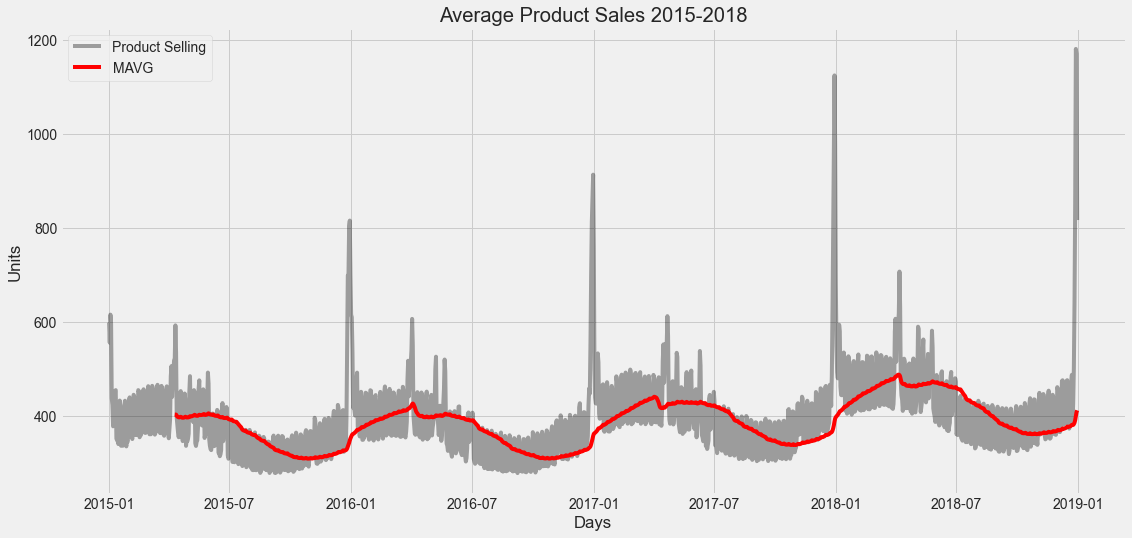

In [71]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (17,8))
ax.plot(grouped1.index, grouped1.num_sold, label = 'Product Selling', color = 'black', alpha = 0.35)
ax.plot(MAVG.index, MAVG.num_sold, label = 'MAVG', color = 'red')
ax.set(xlabel = 'Days', ylabel = 'Units', title = 'Average Product Sales 2015-2018')
ax.legend(loc = 'upper left',fontsize = 'medium')
plt.show()


From the chart , we can see there's a positive trend over years and there's a pattern where the number of product sales tend to increase at the end of the year until few months later (mid year)

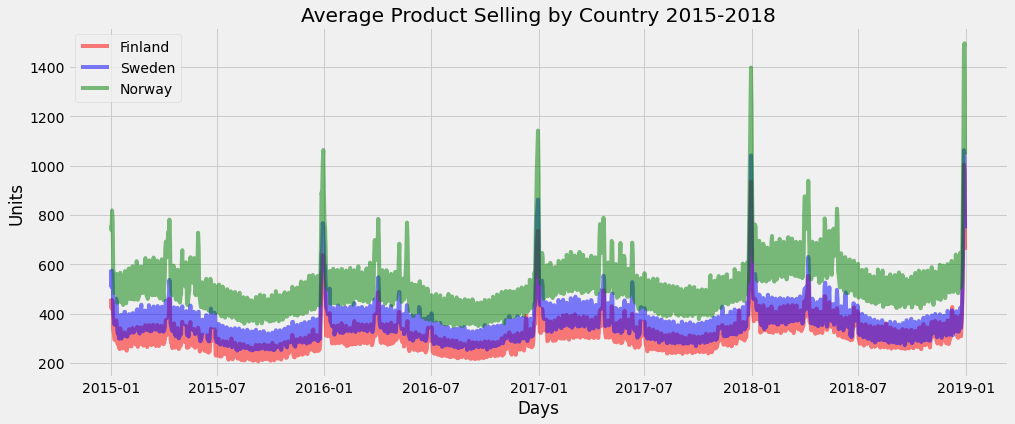

In [16]:
finland_ = sorted_[sorted_['country'] == 'Finland'].groupby('date').mean()
sweden_ = sorted_[sorted_['country'] == 'Sweden'].groupby('date').mean()
norway_ = sorted_[sorted_['country'] == 'Norway'].groupby('date').mean()

#Plots
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(finland_.index, finland_.num_sold, label = 'Finland', color = 'red', alpha = 0.5)
ax.plot(sweden_.index, sweden_.num_sold, label = 'Sweden', color = 'blue', alpha = 0.5)
ax.plot(norway_.index, norway_.num_sold, label = 'Norway', color = 'green', alpha = 0.5)
ax.set(xlabel = 'Days', ylabel = 'Units', title = 'Average Product Selling by Country 2015-2018')
ax.legend(fontsize = 'medium', loc = 'upper left')
plt.show()

From the chart , we can see there's a positive trend over years and there's a pattern where the number of product sales tend to increase at the end of the year until few months later (mid year). from the chart we can clearly see that norway has the higher product sales than the others.

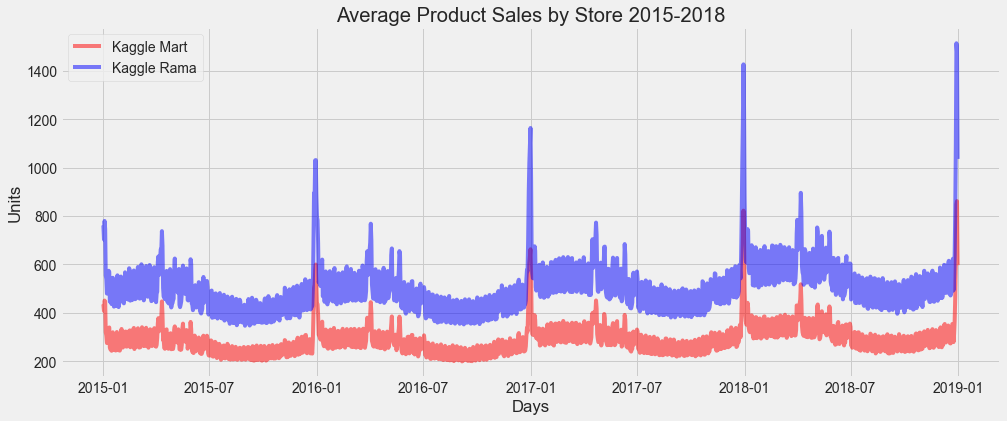

In [87]:
KaggleMart_ = sorted_[sorted_['store'] == 'KaggleMart'].groupby('date').mean()
KaggleRama_ = sorted_[sorted_['store'] == 'KaggleRama'].groupby('date').mean()

#Plots
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(KaggleMart_.index, KaggleMart_.num_sold, label = 'Kaggle Mart', color = 'red', alpha = 0.5)
ax.plot(KaggleRama_.index, KaggleRama_.num_sold, label = 'Kaggle Rama', color = 'blue', alpha = 0.5)
ax.set(xlabel = 'Days', ylabel = 'Units', title = 'Average Product Sales by Store 2015-2018')
ax.legend(fontsize = 'medium', loc = 'upper left')
plt.show()

From the chart , we can see there's a positive trend over years and there's a pattern where the number of product sales tend to increase at the end of the year until few months later (mid year). from the chart we can clearly see that Kaggle rama has the higher product sales than Kaggle Mart.

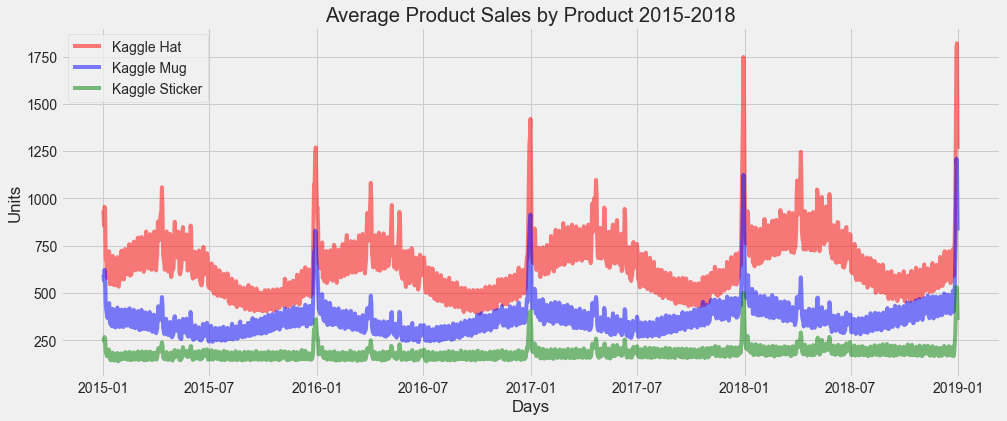

In [88]:
KaggleHat_ = sorted_[sorted_['product'] == 'Kaggle Hat'].groupby('date').mean()
KaggleMug_ = sorted_[sorted_['product'] == 'Kaggle Mug'].groupby('date').mean()
KaggleSticker_ = sorted_[sorted_['product'] == 'Kaggle Sticker'].groupby('date').mean()
#Plots
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(KaggleHat_.index, KaggleHat_.num_sold, label = 'Kaggle Hat', color = 'red', alpha = 0.5)
ax.plot(KaggleMug_.index, KaggleMug_.num_sold, label = 'Kaggle Mug', color = 'blue', alpha = 0.5)
ax.plot(KaggleSticker_.index, KaggleSticker_.num_sold, label = 'Kaggle Sticker', color = 'green', alpha = 0.5)
ax.set(xlabel = 'Days', ylabel = 'Units', title = 'Average Product Sales by Product 2015-2018')
ax.legend(fontsize = 'medium', loc = 'upper left')
plt.show()

From the chart , we can see there's a positive trend over years and there's a pattern where the number of product sales tend to increase at the end of the year until few months later (mid year). from the chart we can clearly see that Kaggel Hatis the most purchased product than the others.

In [41]:
grouped2 = sorted_.groupby(['country','store','product']).resample('Y',on = 'date')['num_sold'].mean()
display(grouped2)

country  store       product         date      
Finland  KaggleMart  Kaggle Hat      2015-12-31    328.947945
                                     2016-12-31    342.773224
                                     2017-12-31    372.758904
                                     2018-12-31    405.493151
                     Kaggle Mug      2015-12-31    185.657534
                                                      ...    
Sweden   KaggleRama  Kaggle Mug      2018-12-31    434.317808
                     Kaggle Sticker  2015-12-31    196.821918
                                     2016-12-31    201.983607
                                     2017-12-31    214.846575
                                     2018-12-31    219.624658
Name: num_sold, Length: 72, dtype: float64

In [42]:
DF_ = pd.DataFrame(grouped2).reset_index()
DF_['year'] = DF_['date'].dt.year
display(DF_.head())

,country,store,product,date,num_sold,year
0,Finland,KaggleMart,Kaggle Hat,2015-12-31,328.947945,2015
1,Finland,KaggleMart,Kaggle Hat,2016-12-31,342.773224,2016
2,Finland,KaggleMart,Kaggle Hat,2017-12-31,372.758904,2017
3,Finland,KaggleMart,Kaggle Hat,2018-12-31,405.493151,2018
4,Finland,KaggleMart,Kaggle Mug,2015-12-31,185.657534,2015


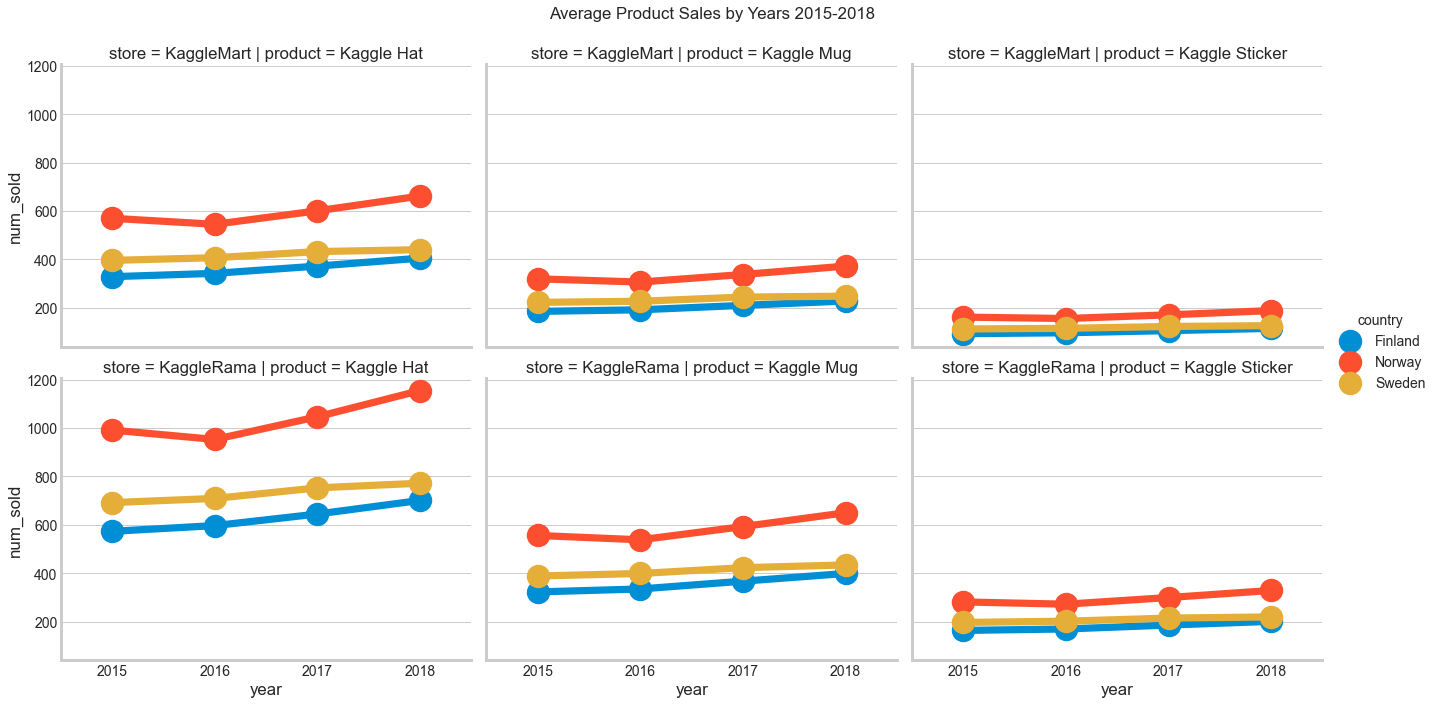

In [89]:
sns.set_style('whitegrid')
cp = sns.catplot(x = 'year', y ='num_sold', col = 'product', row = 'store', hue = 'country', data = DF_, kind = 'point',
           height = 5, aspect = 1.25)
cp.fig.subplots_adjust(top=0.9)
cp.fig.suptitle('Average Product Sales by Years 2015-2018')
plt.show()

From the chart above, we can see the average product sales over the years based on many levels ('Country','Store','Product') more detailed

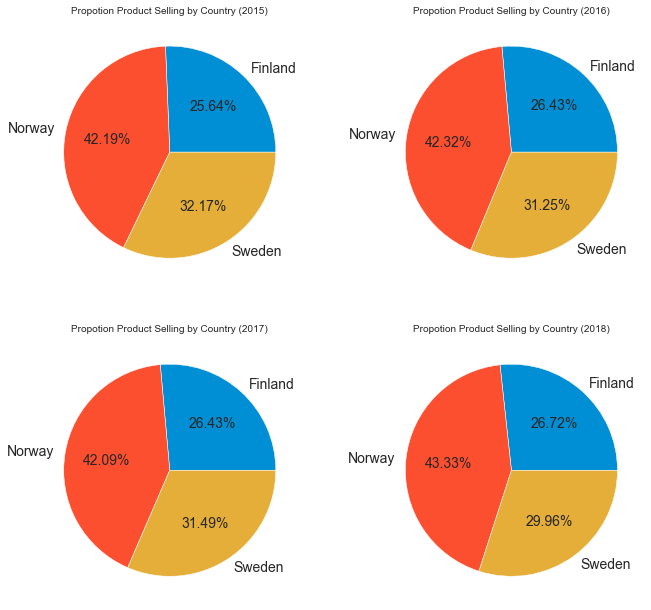

In [91]:
years_ = ['2015','2016','2017','2018']
fig= plt.figure(figsize = (10,10))
for i in range(4):
    val = sorted_[sorted_['date'].isin([years_[i]])].groupby('country')['num_sold'].sum()
    ax = fig.add_subplot(2,2,i+1)
    ax.pie(val.values, labels = val.index,autopct = '%0.2f%%')
    ax.set_title(f'Propotion Product Selling by Country ({years_[i]})', fontdict = {'fontsize' : 10})
plt.show()

We can see Norway has the most propotion than other countries each years based on Product Sales 

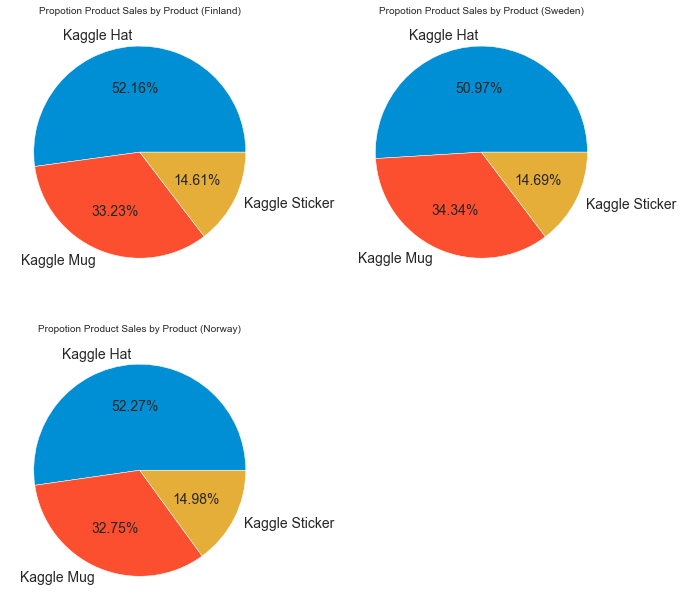

In [68]:
countries_ = ['Finland','Sweden', 'Norway']
fig= plt.figure(figsize = (10,10))
for i in range(3):
    val = sorted_[sorted_['date'].isin([years_[i]])].groupby('product')['num_sold'].sum()
    ax = fig.add_subplot(2,2,i+1)
    ax.pie(val.values, labels = val.index,autopct = '%0.2f%%')
    ax.set_title(f'Propotion Product Sales by Product ({countries_[i]})', fontdict = {'fontsize' : 10})
plt.show()

In [ ]:
We can see Kaggle hat has the most propotion than other products each years based on the number purchased product.